<a href="https://colab.research.google.com/github/jiin124/4th_kaggle_study/blob/main/5%EC%A3%BC%EC%B0%A8/%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80_%EC%8B%A4%EC%8A%B5_%EB%B0%B0%EC%B6%94%EA%B0%80%EA%B2%A9_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 배추가격 예측을 위한 데이터

▶ year - 년,월,일 정보

▶ avgTemp - 평균기온

▶ minTemp - 최저기온

▶ maxTemp - 최고기온

▶ rainFall - 강수량

▶ avgPrice - 배추가격


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.environ['KAGGLE_USERNAME']='jiinpp'
os.environ['KAGGLE_KEY']="b06d525a9f66198051ccb648b091778a"

In [3]:
!kaggle competitions download -c 2021-ai-w3-p1

  0% 0.00/79.6k [00:00<?, ?B/s]
100% 79.6k/79.6k [00:00<00:00, 67.4MB/s]
  0% 0.00/681 [00:00<?, ?B/s]
100% 681/681 [00:00<00:00, 654kB/s]
  0% 0.00/219 [00:00<?, ?B/s]
100% 219/219 [00:00<00:00, 204kB/s]


In [40]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
sample=pd.read_csv('submit_sample.csv')

In [5]:
train.head()

,year,avgTemp,minTemp,maxTemp,rainFall,avgPrice
0,20100101,-4.9,-11.0,0.9,0.0,2123
1,20100102,-3.1,-5.5,5.5,0.8,2123
2,20100103,-2.9,-6.9,1.4,0.0,2123
3,20100104,-1.8,-5.1,2.2,5.9,2020
4,20100105,-5.2,-8.7,-1.8,0.7,2060


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      2557 non-null   int64  
 1   avgTemp   2557 non-null   float64
 2   minTemp   2557 non-null   float64
 3   maxTemp   2557 non-null   float64
 4   rainFall  2557 non-null   float64
 5   avgPrice  2557 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 120.0 KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      24 non-null     int64  
 1   avgTemp   24 non-null     float64
 2   minTemp   24 non-null     float64
 3   maxTemp   24 non-null     float64
 4   rainFall  24 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.1 KB


## 1차 데이터 분석

In [41]:
train['year']=train['year'].astype('str')
test['year']=test['year'].astype('str')

In [42]:
train["month"]=train["year"].str[4:6]
train["day"]=train["year"].str[7]
train["year1"]=train["year"].str[0:4]


In [43]:
test["month"]=test["year"].str[4:6]
test["day"]=test["year"].str[7]
test["year1"]=test["year"].str[0:4]

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      2557 non-null   object 
 1   avgTemp   2557 non-null   float64
 2   minTemp   2557 non-null   float64
 3   maxTemp   2557 non-null   float64
 4   rainFall  2557 non-null   float64
 5   avgPrice  2557 non-null   int64  
 6   month     2557 non-null   object 
 7   day       2557 non-null   object 
 8   year1     2557 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 179.9+ KB


In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      24 non-null     object 
 1   avgTemp   24 non-null     float64
 2   minTemp   24 non-null     float64
 3   maxTemp   24 non-null     float64
 4   rainFall  24 non-null     float64
 5   month     24 non-null     object 
 6   day       24 non-null     object 
 7   year1     24 non-null     object 
dtypes: float64(4), object(4)
memory usage: 1.6+ KB


In [44]:
train.drop('year',axis=1,inplace=True)
test.drop('year',axis=1,inplace=True)

In [45]:
train['year1']=train['year1'].astype('int')
train['month']=train['month'].astype('int')
train['day']=train['day'].astype('int')

test['year1']=test['year1'].astype('int')
test['month']=test['month'].astype('int')
test['day']=test['day'].astype('int')

In [21]:
train.head()

,avgTemp,minTemp,maxTemp,rainFall,avgPrice,month,day,year1
0,-4.9,-11.0,0.9,0.0,2123,1,1,2010
1,-3.1,-5.5,5.5,0.8,2123,1,2,2010
2,-2.9,-6.9,1.4,0.0,2123,1,3,2010
3,-1.8,-5.1,2.2,5.9,2020,1,4,2010
4,-5.2,-8.7,-1.8,0.7,2060,1,5,2010


In [22]:
test.head()

,avgTemp,minTemp,maxTemp,rainFall,month,day,year1
0,4.0,-1.4,9.5,0.1,1,7,2017
1,-1.7,-5.4,1.4,3.3,1,0,2017
2,1.4,-2.0,5.0,0.0,2,3,2017
3,3.6,-2.5,11.1,0.1,2,7,2017
4,5.0,-1.6,11.3,0.0,3,9,2017


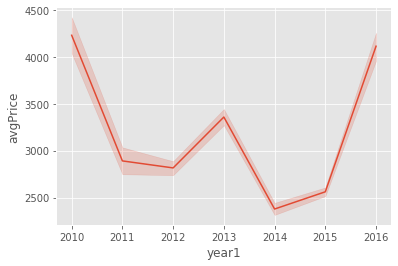

In [ ]:
sns.lineplot(data=train,x='year1',y='avgPrice')

2010년과 2016년에 무슨일이..! 배춧값이 엄청나다!

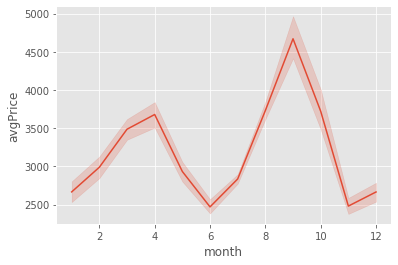

In [ ]:
sns.lineplot(data=train,x='month',y='avgPrice')

왜 9월에 배춧값이 보통 높은거지

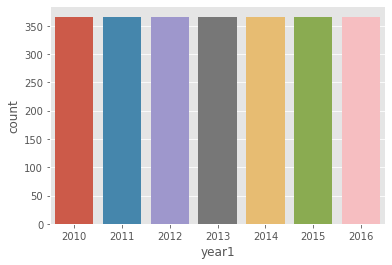

In [25]:
sns.countplot(data=train,x='year1')

In [33]:
test['year1'].value_counts()

2017    24
Name: year1, dtype: int64

In [27]:
train['year1'].value_counts()

2012    366
2016    366
2010    365
2011    365
2013    365
2014    365
2015    365
Name: year1, dtype: int64

In [46]:
train.groupby('year1').sum()

,avgTemp,minTemp,maxTemp,rainFall,avgPrice,month,day
year1,,,,,,,
2010,4636.6,2968.7,6567.4,1444.1,1545647,2382,1618
2011,4543.7,2865.8,6469.1,1621.5,1055336,2382,1618
2012,4528.8,2857.0,6451.8,1478.8,1030784,2384,1627
2013,4729.9,2996.0,6728.2,1161.7,1226513,2382,1618
2014,4799.4,3063.2,6812.5,1173.6,867551,2382,1618
2015,4917.4,3194.1,6896.8,948.3,934803,2382,1618
2016,4985.3,3304.4,6924.8,1271.7,1506967,2384,1627


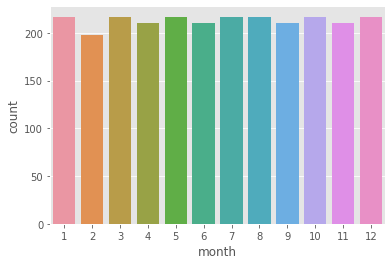

In [26]:
sns.countplot(data=train,x='month')

In [34]:
test['month'].value_counts()

1     2
2     2
3     2
4     2
5     2
6     2
7     2
8     2
9     2
10    2
11    2
12    2
Name: month, dtype: int64

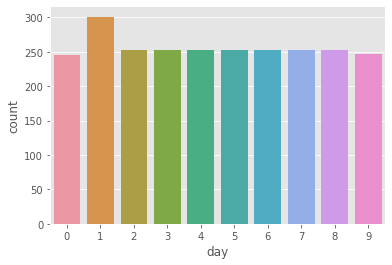

In [28]:
sns.countplot(data=train,x='day')

In [35]:
test['day'].value_counts()

8    5
0    4
7    3
3    3
9    2
2    2
6    2
5    2
1    1
Name: day, dtype: int64

year,month,day는 라벨인코더 사용

In [36]:
label=['month','day']

In [37]:
from sklearn.preprocessing import LabelEncoder

la=LabelEncoder()
for i in label:
  train[i]=la.fit_transform(train[i].values.reshape(-1,1))
  test[i]=la.transform(test[i].values.reshape(-1,1))

In [48]:
mapping={2010:1,2011:2,2012:3,2013:4,2014:5,2015:6,2016:7,2017:8}

train['year1']=train['year1'].map(mapping)
test['year1']=test['year1'].map(mapping)

In [49]:
train.columns

Index(['avgTemp', 'minTemp', 'maxTemp', 'rainFall', 'avgPrice', 'month', 'day',
       'year1'],
      dtype='object')

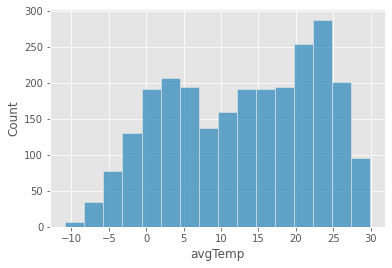

In [ ]:
sns.histplot(data=train,x='avgTemp')

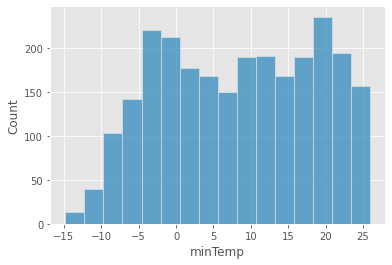

In [ ]:
sns.histplot(data=train,x='minTemp')

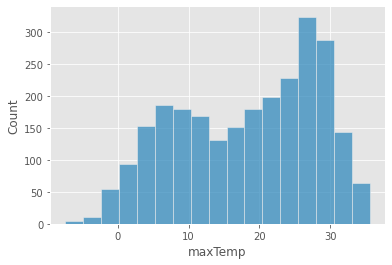

In [ ]:
sns.histplot(data=train,x='maxTemp')


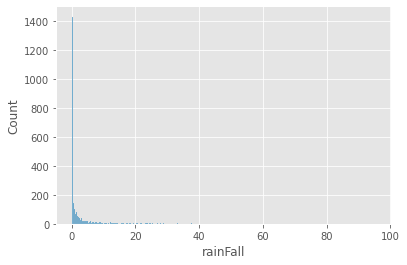

In [ ]:
sns.histplot(data=train,x='rainFall')

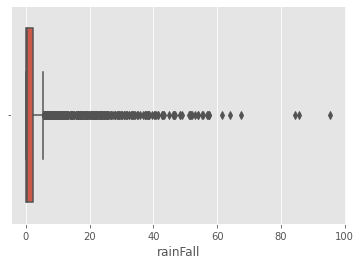

In [ ]:
sns.boxplot(data=train,x='rainFall')

In [51]:
from sklearn.preprocessing import StandardScaler

cat=['avgTemp', 'minTemp', 'maxTemp', 'rainFall']
st=StandardScaler()

for i in cat:
  train[i]=st.fit_transform(train[i].values.reshape(-1,1))
  test[i]=st.transform(test[i].values.reshape(-1,1))

display(train.head())
print()
display(test.head())

,avgTemp,minTemp,maxTemp,rainFall,avgPrice,month,day,year1
0,-1.823591,-1.886750,-1.775586,-0.402487,2123,1,1,1
1,-1.639812,-1.349360,-1.306784,-0.312008,2123,1,2,1
2,-1.619392,-1.486150,-1.724629,-0.402487,2123,1,3,1
3,-1.507082,-1.310277,-1.643098,0.264792,2020,1,4,1
4,-1.854220,-1.662023,-2.050752,-0.323318,2060,1,5,1


,avgTemp,minTemp,maxTemp,rainFall,month,day,year1
0,-0.914906,-0.948759,-0.899130,-0.391177,1,7,8
1,-1.496872,-1.339589,-1.724629,-0.029263,1,0,8
2,-1.180364,-1.007384,-1.357741,-0.402487,2,3,8
3,-0.955746,-1.056237,-0.736069,-0.391177,2,7,8
4,-0.812806,-0.968301,-0.715686,-0.402487,3,9,8


이상치를 없애야 할까..?

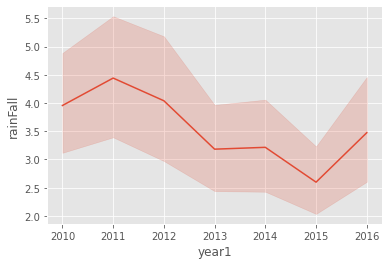

In [ ]:
sns.lineplot(data=train,
             x='year1',
             y='rainFall')

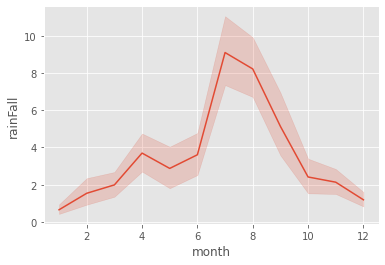

In [ ]:
sns.lineplot(data=train,
             x='month',
             y='rainFall')

강수량과, 배춧값은 어느정도 연관성이 있어보인다. 강수량이 6월에서 8월 사이에 장마로 많은데 배춧값은 9월쯤에 가장 비싸다

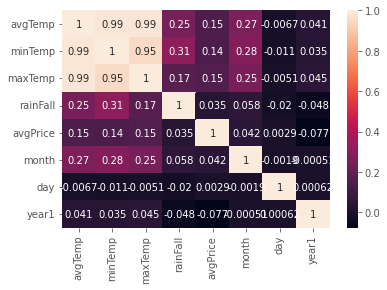

In [ ]:
plt.figure()
sns.heatmap(train.corr(),annot=True)

In [63]:
train.drop(['minTemp','maxTemp'],axis=1,inplace=True)
test.drop(['minTemp','maxTemp'],axis=1,inplace=True)
#다중공선성을 위해서 삭제

In [68]:
train.head()

,avgTemp,rainFall,avgPrice,month,day,year1
0,-1.823591,-0.402487,2123,1,1,1
1,-1.639812,-0.312008,2123,1,2,1
2,-1.619392,-0.402487,2123,1,3,1
3,-1.507082,0.264792,2020,1,4,1
4,-1.854220,-0.323318,2060,1,5,1


## Matrix Data Representation

In [64]:
import torch
import torch.optim as optim

torch.manual_seed(1)

In [66]:
xt=train.drop('avgPrice',axis=1)
yt=train['avgPrice']
xt=test

In [67]:
x_train = torch.Tensor(np.array(xt))
y_train = torch.Tensor(np.array(yt))
x_test = torch.Tensor(np.array(xt))

In [69]:
# 모델 초기화
W = torch.zeros((5,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.000001)


nb_epochs = 100000

for epoch in range(nb_epochs + 1):

    # H(x) 계산
    # Matrix 연산!!
    hypothesis = x_train.matmul(W) + b # or .mm or @
    
    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/100000 Cost: 12013343.000000
Epoch  100/100000 Cost: 11496016.000000
Epoch  200/100000 Cost: 11006091.000000
Epoch  300/100000 Cost: 10542114.000000
Epoch  400/100000 Cost: 10102708.000000
Epoch  500/100000 Cost: 9686569.000000
Epoch  600/100000 Cost: 9292460.000000
Epoch  700/100000 Cost: 8919216.000000
Epoch  800/100000 Cost: 8565728.000000
Epoch  900/100000 Cost: 8230947.000000
Epoch 1000/100000 Cost: 7913880.000000
Epoch 1100/100000 Cost: 7613589.000000
Epoch 1200/100000 Cost: 7329182.000000
Epoch 1300/100000 Cost: 7059815.500000
Epoch 1400/100000 Cost: 6804694.500000
Epoch 1500/100000 Cost: 6563059.000000
Epoch 1600/100000 Cost: 6334195.500000
Epoch 1700/100000 Cost: 6117427.500000
Epoch 1800/100000 Cost: 5912111.000000
Epoch 1900/100000 Cost: 5717639.500000
Epoch 2000/100000 Cost: 5533437.000000
Epoch 2100/100000 Cost: 5358960.000000
Epoch 2200/100000 Cost: 5193689.000000
Epoch 2300/100000 Cost: 5037138.500000
Epoch 2400/100000 Cost: 4888845.000000
Epoch 2500/100000 Co

In [70]:
predict = x_test.matmul(W) + b

In [71]:
sample['Expected']=predict.detach().numpy()

In [72]:
sample

,Id,Expected
0,0,2982.087891
1,1,2673.875000
2,2,2854.458740
3,3,3030.835205
4,4,3167.408447
5,5,3121.608398
6,6,2901.059082
7,7,2808.090820
8,8,2990.604492
9,9,3211.401123


In [73]:
sample.to_csv('sample.csv',index=False)

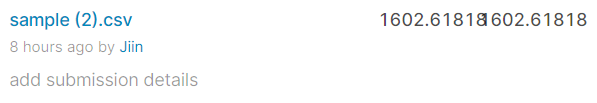

위의 점수는 년월일로 나누고 아무런 전처리도 하지 않고 모델을 돌렸을 때의 결과이다. 

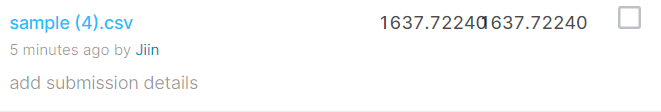

년월일로 나누고, 년월일은 매핑, 나머지는 스케일러 적용 후 나온 점수

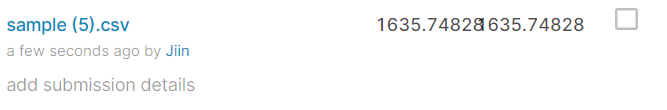

년월일 나누고, 년월일, 매핑, 나머지 스켕이러 적용후 다중공선성을 위해 avg값을 제외한 나머지 두값 삭제

## 4번째 코드에서 다시 돌리기 

- 이번에는 그냥 날짜데이터 전처리 안하고 빼고 모델돌려보기



In [6]:
import torch
import torch.optim as optim

In [7]:
torch.manual_seed(1)

In [8]:
x_train=torch.Tensor(np.array(train)[:,1:-1])
y_train=torch.Tensor(np.array(train)[:,-1])
x_test=torch.Tensor(np.array(test)[:,1:])

In [9]:
W=torch.zeros((4,1),requires_grad=True)
b=torch.zeros(1,requires_grad=True)

optimizer=optim.SGD([W,b],lr=0.001)

nb_epochs=1000

for epoch in range(nb_epochs+1):

  #H(x)계산
  hypothesis=x_train.matmul(W)+b

  #cost 계산
  cost=torch.mean((hypothesis-y_train)**2)

  #cost로 H(x)개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch %100==0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch,nb_epochs,cost.item()
    ))

Epoch    0/1000 Cost: 12013343.000000
Epoch  100/1000 Cost: 2373769.000000
Epoch  200/1000 Cost: 2359780.250000
Epoch  300/1000 Cost: 2346367.500000
Epoch  400/1000 Cost: 2333321.250000
Epoch  500/1000 Cost: 2320630.500000
Epoch  600/1000 Cost: 2308284.250000
Epoch  700/1000 Cost: 2296271.000000
Epoch  800/1000 Cost: 2284581.500000
Epoch  900/1000 Cost: 2273205.750000
Epoch 1000/1000 Cost: 2262133.000000


In [10]:
predict=x_test.matmul(W)+b


In [11]:
submit=pd.read_csv('submit_sample.csv')
submit['Expected']=predict.detach().numpy()

In [12]:
submit

,Id,Expected
0,0,2873.745117
1,1,1935.066895
2,2,1959.736328
3,3,3519.638428
4,4,3313.127686
5,5,3390.072266
6,6,2973.496826
7,7,4289.859375
8,8,3641.330078
9,9,4409.956543


In [13]:
submit.to_csv('sample.csv',index=False)

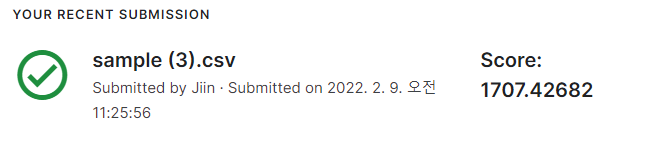

그냥 년월일 없애고 돌린 결과

## 모델 개선

1. 첫번째 방법

- 년월일 그대로 두고
- 나머지 값 스케일링
- 다중공선성 해결

2. 두번째 방법
- 년월일 그대로 두고
- 나머지 값 그대로 두고
- 다중공선성 해결

### 첫번째 방법

In [74]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
sample=pd.read_csv('submit_sample.csv')

In [75]:
train['year']=train['year'].astype('str')

test['year']=test['year'].astype('str')

In [76]:
train["month"]=train["year"].str[4:6]

train["day"]=train["year"].str[7]

train["year1"]=train["year"].str[0:4]

test["month"]=test["year"].str[4:6]

test["day"]=test["year"].str[7]

test["year1"]=test["year"].str[0:4]

In [77]:
train.drop('year',axis=1,inplace=True)

test.drop('year',axis=1,inplace=True)

train['year1']=train['year1'].astype('int')

train['month']=train['month'].astype('int')

train['day']=train['day'].astype('int')



In [78]:
test['year1']=test['year1'].astype('int')

test['month']=test['month'].astype('int')

test['day']=test['day'].astype('int')

In [79]:
from sklearn.preprocessing import StandardScaler



cat=['avgTemp', 'minTemp', 'maxTemp', 'rainFall']

st=StandardScaler()



for i in cat:

 train[i]=st.fit_transform(train[i].values.reshape(-1,1))

 test[i]=st.transform(test[i].values.reshape(-1,1))



display(train.head())

print()

display(test.head())

,avgTemp,minTemp,maxTemp,rainFall,avgPrice,month,day,year1
0,-1.823591,-1.886750,-1.775586,-0.402487,2123,1,1,2010
1,-1.639812,-1.349360,-1.306784,-0.312008,2123,1,2,2010
2,-1.619392,-1.486150,-1.724629,-0.402487,2123,1,3,2010
3,-1.507082,-1.310277,-1.643098,0.264792,2020,1,4,2010
4,-1.854220,-1.662023,-2.050752,-0.323318,2060,1,5,2010


,avgTemp,minTemp,maxTemp,rainFall,month,day,year1
0,-0.914906,-0.948759,-0.899130,-0.391177,1,7,2017
1,-1.496872,-1.339589,-1.724629,-0.029263,1,0,2017
2,-1.180364,-1.007384,-1.357741,-0.402487,2,3,2017
3,-0.955746,-1.056237,-0.736069,-0.391177,2,7,2017
4,-0.812806,-0.968301,-0.715686,-0.402487,3,9,2017


In [80]:
train.columns

Index(['avgTemp', 'minTemp', 'maxTemp', 'rainFall', 'avgPrice', 'month', 'day',
       'year1'],
      dtype='object')

In [81]:
train=train.drop(['minTemp', 'maxTemp'],axis=1)
test=test.drop(['minTemp', 'maxTemp'],axis=1)

In [84]:
# 모델 초기화
W = torch.zeros((5,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.00001)


nb_epochs = 150000

for epoch in range(nb_epochs + 1):

    # H(x) 계산
    # Matrix 연산!!
    hypothesis = x_train.matmul(W) + b # or .mm or @
    
    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/150000 Cost: 12013343.000000
Epoch  100/150000 Cost: 7910102.000000
Epoch  200/150000 Cost: 5529055.500000
Epoch  300/150000 Cost: 4145698.500000
Epoch  400/150000 Cost: 3340352.250000
Epoch  500/150000 Cost: 2869914.000000
Epoch  600/150000 Cost: 2593562.750000
Epoch  700/150000 Cost: 2429725.250000
Epoch  800/150000 Cost: 2331145.750000
Epoch  900/150000 Cost: 2270451.000000
Epoch 1000/150000 Cost: 2231782.250000
Epoch 1100/150000 Cost: 2205951.750000
Epoch 1200/150000 Cost: 2187634.750000
Epoch 1300/150000 Cost: 2173745.250000
Epoch 1400/150000 Cost: 2162494.750000
Epoch 1500/150000 Cost: 2152844.500000
Epoch 1600/150000 Cost: 2144192.000000
Epoch 1700/150000 Cost: 2136186.250000
Epoch 1800/150000 Cost: 2128621.750000
Epoch 1900/150000 Cost: 2121378.500000
Epoch 2000/150000 Cost: 2114386.000000
Epoch 2100/150000 Cost: 2107601.250000
Epoch 2200/150000 Cost: 2100998.000000
Epoch 2300/150000 Cost: 2094559.500000
Epoch 2400/150000 Cost: 2088275.250000
Epoch 2500/150000 Cost: 

In [85]:
predict = x_test.matmul(W) + b

In [86]:
sample['Expected']=predict.detach().numpy()

In [87]:
sample.to_csv('sample.csv',index=False)

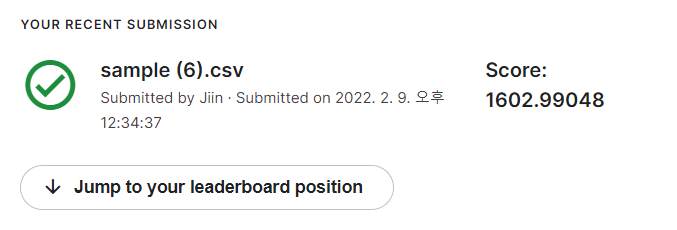

### 두번쨰 방법

In [88]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
sample=pd.read_csv('submit_sample.csv')

In [89]:
train['year']=train['year'].astype('str')

test['year']=test['year'].astype('str')

In [90]:
train["month"]=train["year"].str[4:6]

train["day"]=train["year"].str[7]

train["year1"]=train["year"].str[0:4]

test["month"]=test["year"].str[4:6]

test["day"]=test["year"].str[7]

test["year1"]=test["year"].str[0:4]

In [91]:
train.drop('year',axis=1,inplace=True)

test.drop('year',axis=1,inplace=True)

train['year1']=train['year1'].astype('int')

train['month']=train['month'].astype('int')

train['day']=train['day'].astype('int')


In [92]:
test['year1']=test['year1'].astype('int')

test['month']=test['month'].astype('int')

test['day']=test['day'].astype('int')

In [93]:
train=train.drop(['minTemp', 'maxTemp'],axis=1)
test=test.drop(['minTemp', 'maxTemp'],axis=1)

In [94]:
# 모델 초기화
W = torch.zeros((5,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.00001)


nb_epochs = 150000

for epoch in range(nb_epochs + 1):

    # H(x) 계산
    # Matrix 연산!!
    hypothesis = x_train.matmul(W) + b # or .mm or @
    
    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/150000 Cost: 12013343.000000
Epoch  100/150000 Cost: 7910102.000000
Epoch  200/150000 Cost: 5529055.500000
Epoch  300/150000 Cost: 4145698.500000
Epoch  400/150000 Cost: 3340352.250000
Epoch  500/150000 Cost: 2869914.000000
Epoch  600/150000 Cost: 2593562.750000
Epoch  700/150000 Cost: 2429725.250000
Epoch  800/150000 Cost: 2331145.750000
Epoch  900/150000 Cost: 2270451.000000
Epoch 1000/150000 Cost: 2231782.250000
Epoch 1100/150000 Cost: 2205951.750000
Epoch 1200/150000 Cost: 2187634.750000
Epoch 1300/150000 Cost: 2173745.250000
Epoch 1400/150000 Cost: 2162494.750000
Epoch 1500/150000 Cost: 2152844.500000
Epoch 1600/150000 Cost: 2144192.000000
Epoch 1700/150000 Cost: 2136186.250000
Epoch 1800/150000 Cost: 2128621.750000
Epoch 1900/150000 Cost: 2121378.500000
Epoch 2000/150000 Cost: 2114386.000000
Epoch 2100/150000 Cost: 2107601.250000
Epoch 2200/150000 Cost: 2100998.000000
Epoch 2300/150000 Cost: 2094559.500000
Epoch 2400/150000 Cost: 2088275.250000
Epoch 2500/150000 Cost: 

In [95]:
predict = x_test.matmul(W) + b

In [96]:
sample['Expected']=predict.detach().numpy()

In [97]:
sample.to_csv('sample.csv',index=False)